#    SPARKS FOUNDATION - GRIP 

## Data Science and Business Analytics Internship 

####  Akshay's Notebook

## Predict the percentage of an student based on the no. of study hours.

###   Data Loading and Analysis 

In [1]:
import pandas as pd
import numpy as np
path='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(path)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [2]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().values.any()

False

In [6]:
df.count()

Hours     25
Scores    25
dtype: int64

In [7]:
df.shape

(25, 2)

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.groupby(['Hours','Scores']).size()

Hours  Scores
1.1    17        1
1.5    20        1
1.9    24        1
2.5    21        1
       30        1
2.7    25        1
       30        1
3.2    27        1
3.3    42        1
3.5    30        1
3.8    35        1
4.5    41        1
4.8    54        1
5.1    47        1
5.5    60        1
5.9    62        1
6.1    67        1
6.9    76        1
7.4    69        1
7.7    85        1
7.8    86        1
8.3    81        1
8.5    75        1
8.9    95        1
9.2    88        1
dtype: int64

In [10]:
df.loc[0:2]

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [11]:
df.iloc[0:6,1:2]

,Scores
0,21
1,47
2,27
3,75
4,30
5,20


<AxesSubplot:>

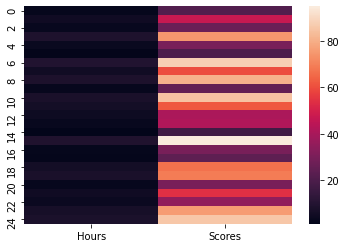

In [12]:
import seaborn as sns
sns.heatmap(df)

In [13]:
x=df[['Hours']]
y=df[['Scores']]

###  Modelling with linear Regression

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print(model)

LinearRegression()


In [16]:
print(model.coef_)

[[9.90482759]]


In [17]:
print(model.intercept_)

[0.11629885]


In [18]:
 pd.DataFrame(model.coef_,x.columns,columns=['Coeff'])

,Coeff
Hours,9.904828


In [19]:
predictions=model.predict(x_test)
predictions

array([[14.97354023],
       [31.81174713],
       [73.41202299],
       [24.87836782],
       [58.55478161],
       [37.75464368],
       [18.93547126],
       [77.37395402],
       [68.4596092 ],
       [11.0116092 ],
       [50.63091954],
       [76.38347126],
       [32.80222989]])

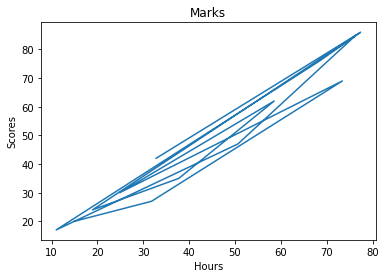

In [20]:
import matplotlib.pyplot as plt
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Marks')
plt.plot(predictions,y_test)

Text(0.5, 1.0, 'Percentage')

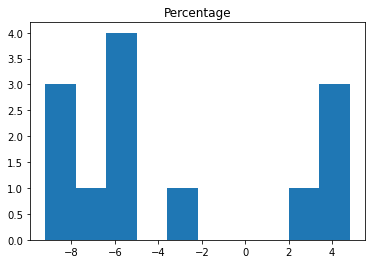

In [21]:
plt.hist(predictions-y_test)
plt.title('Percentage')

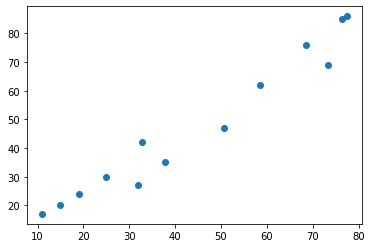

In [22]:
plt.scatter(predictions,y_test)

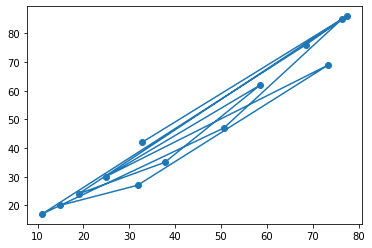

In [26]:
plt.scatter(predictions,y_test)
plt.plot(predictions,y_test)
plt.show()

In [27]:
from sklearn import metrics
metrics.mean_absolute_error(predictions,y_test)
print('Mean Absolute Error:',metrics.mean_absolute_error(predictions,y_test))

Mean Absolute Error: 5.710484526967277


In [28]:
import numpy as np
print('Mean Squared Error:',np.sqrt(metrics.mean_squared_error(predictions,y_test)))

Mean Squared Error: 6.0661508549479315


In [29]:
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(predictions,y_test)))

Root Mean Squared Error: 6.0661508549479315


# What will be the predicted score if a student studies for 9.25 hrs/ day?

In [30]:
a=model.predict([[9.25]])
score=a[0]
print(int(score),'% if student studies for 9.25 hours a day')

91 % if student studies for 9.25 hours a day
